## Analysis 5
1. Where do the injuries occur(location) during different times of the year? 

Assumption

People are treated approximate close to date of injury (treatment date is first visit for a particular injury)

In [1]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [2]:
#Reading the required files
df1=pd.read_csv(r"NEISS Data/NEISS2014.csv")
df2=pd.read_csv(r"NEISS Data/IncidentLocale.csv")

In [4]:
df3=pd.merge(df1,df2, how="left", left_on="location",right_on="Code")

In [5]:
#Removing data where location not recorded
df3=df3[df3['Incident Locale']!='Not recorded']

In [6]:
#Converting date column to date time format
df3['trmt_date']=pd.to_datetime(df3['trmt_date'])


In [7]:
#Creating a column with the month of the year
df3['MONTH']=df3['trmt_date'].dt.month.apply(lambda x: calendar.month_abbr[x])

In [8]:
#Calculating number of incidents occured in every locale for each month of the year
df4=df3.groupby(['MONTH','Incident Locale'])['Incident Locale'].agg({'Frequency':'count'}).reset_index()

In [9]:
#Calculating number of incidents occured in every locale for each month of the year
df5=df3.groupby('MONTH')['Incident Locale'].agg({'Frequency':'count'}).reset_index()

In [10]:
df6=df5.sort_values('Frequency').reset_index(drop=True)
print(df6)

   MONTH  Frequency
0    Nov       3331
1    Dec       3380
2    Feb       3453
3    Jan       3601
4    Jul       3740
5    Aug       3768
6    Apr       3790
7    Mar       3980
8    Jun       4170
9    Oct       4226
10   Sep       4248
11   May       4567


In [11]:
## We will down further to get insights on the location of injury for every month

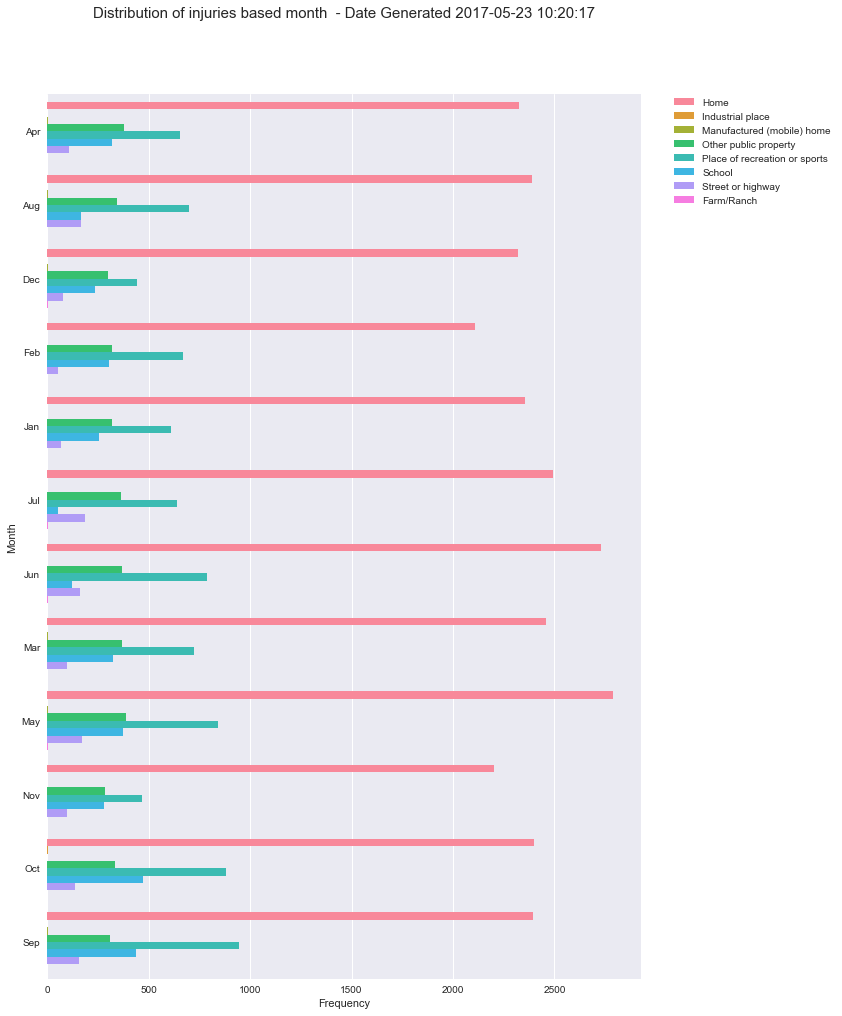

In [13]:
#Visualizing data 
g=sns.factorplot(x="Frequency",y="MONTH",hue="Incident Locale",data=df4,saturation=1.2,size=13,aspect=0.7,kind="bar",legend=False)

plt.title('Distribution of injuries based month  - Date Generated '+str(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')),fontsize=15,y=1.08)
plt.xlabel('Frequency')
plt.ylabel('Month')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig1 = plt.gcf()
plt.show()


### Conclusion

* We can conclude that maximum number of incidents occur during the start of summer and fall (May and September).
* The less number of injuries during November and december can be attributed to less people coming out of their homes during Winter (November and December)
* Maximum injuries in places of recreation or sports is during September (Fall). Taking precautions in such places can avoid such accidents.
* It can also be easily concluded that maximum incidents occur at home